# Cleaning categorical data

### Import the necessary libraries if you are starting a new notebook.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
import numpy as np
from scipy.stats import chi2_contingency
from sklearn.preprocessing import MinMaxScaler

### Load the csv. Use the variable customer_df as customer_df = pd.read_csv().

In [2]:
customer_df = pd.read_csv('we_fn_use_c_marketing_customer_value_analysis.csv')

In [3]:
customer_df

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,California,23405.987980,No,Basic,Bachelor,2/10/11,Employed,M,71941,...,89,0,2,Personal Auto,Personal L1,Offer2,Web,198.234764,Four-Door Car,Medsize
9130,PK87824,California,3096.511217,Yes,Extended,College,2/12/11,Employed,F,21604,...,28,0,1,Corporate Auto,Corporate L3,Offer1,Branch,379.200000,Four-Door Car,Medsize
9131,TD14365,California,8163.890428,No,Extended,Bachelor,2/6/11,Unemployed,M,0,...,37,3,2,Corporate Auto,Corporate L2,Offer1,Branch,790.784983,Four-Door Car,Medsize
9132,UP19263,California,7524.442436,No,Extended,College,2/3/11,Employed,M,21941,...,3,0,3,Personal Auto,Personal L2,Offer3,Branch,691.200000,Four-Door Car,Large


### What should we do with the customer_id column?

In [4]:
customer_df = customer_df.drop('Customer', axis=1)

We have dropped the 'Customer' column, as it has a different value per row. 

### Load the continuous and discrete variables into numericals_df and categorical_df variables

In [5]:
customer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 23 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   State                          9134 non-null   object 
 1   Customer Lifetime Value        9134 non-null   float64
 2   Response                       9134 non-null   object 
 3   Coverage                       9134 non-null   object 
 4   Education                      9134 non-null   object 
 5   Effective To Date              9134 non-null   object 
 6   EmploymentStatus               9134 non-null   object 
 7   Gender                         9134 non-null   object 
 8   Income                         9134 non-null   int64  
 9   Location Code                  9134 non-null   object 
 10  Marital Status                 9134 non-null   object 
 11  Monthly Premium Auto           9134 non-null   int64  
 12  Months Since Last Claim        9134 non-null   i

In [6]:
customer_df['Effective To Date'] = pd.to_datetime(customer_df['Effective To Date'])

In [7]:
numerical_df = customer_df.select_dtypes(include=['int', 'float'])

numerical_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer Lifetime Value        9134 non-null   float64
 1   Income                         9134 non-null   int64  
 2   Monthly Premium Auto           9134 non-null   int64  
 3   Months Since Last Claim        9134 non-null   int64  
 4   Months Since Policy Inception  9134 non-null   int64  
 5   Number of Open Complaints      9134 non-null   int64  
 6   Number of Policies             9134 non-null   int64  
 7   Total Claim Amount             9134 non-null   float64
dtypes: float64(2), int64(6)
memory usage: 571.0 KB


In [8]:
categorical_df = customer_df.select_dtypes(include=['object'])

categorical_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   State             9134 non-null   object
 1   Response          9134 non-null   object
 2   Coverage          9134 non-null   object
 3   Education         9134 non-null   object
 4   EmploymentStatus  9134 non-null   object
 5   Gender            9134 non-null   object
 6   Location Code     9134 non-null   object
 7   Marital Status    9134 non-null   object
 8   Policy Type       9134 non-null   object
 9   Policy            9134 non-null   object
 10  Renew Offer Type  9134 non-null   object
 11  Sales Channel     9134 non-null   object
 12  Vehicle Class     9134 non-null   object
 13  Vehicle Size      9134 non-null   object
dtypes: object(14)
memory usage: 999.2+ KB


### Plot every categorical variable. What can you see in the plots? Note that in the previous lab you used a bar plot to plot categorical data, with each unique category in the column on the x-axis and an appropriate measure on the y-axis. However, this time you will try a different plot. This time in each plot for the categorical variable you will have, each unique category in the column on the x-axis and the target(which is numerical) on the Y-axis

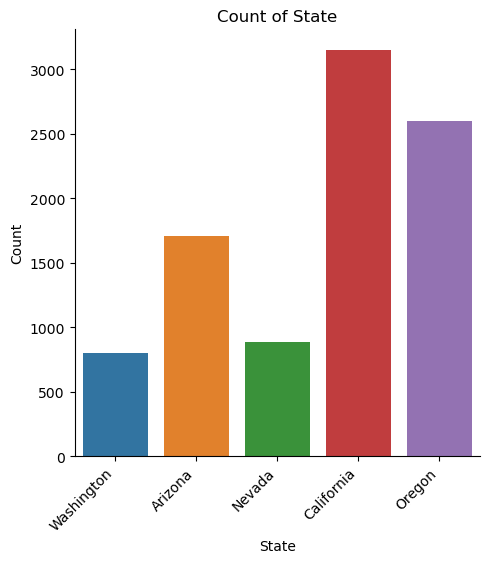

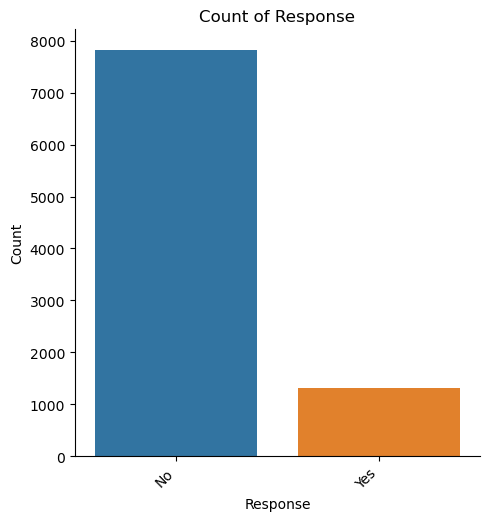

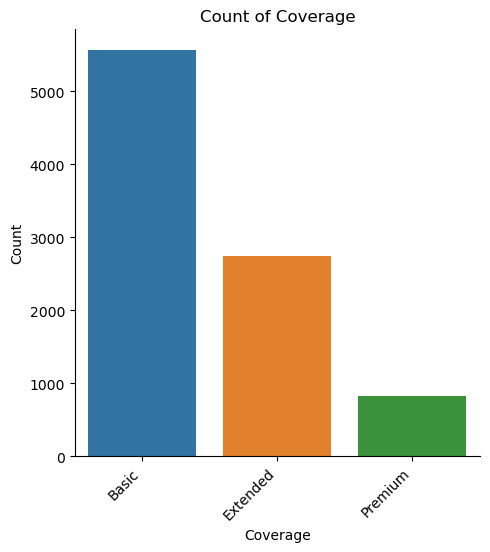

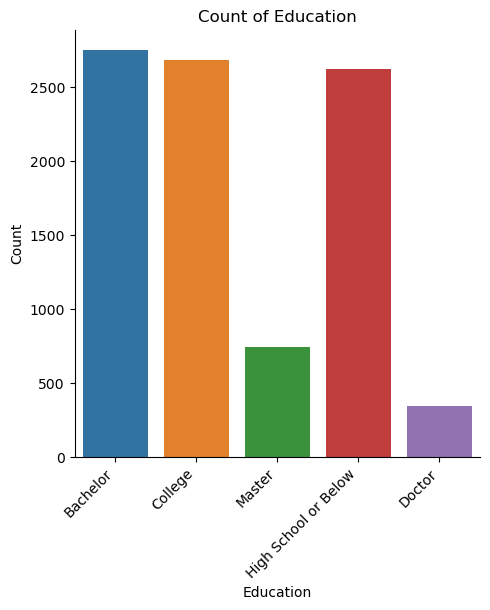

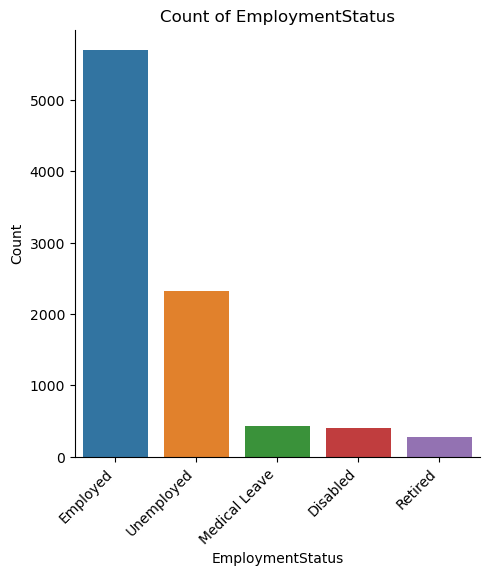

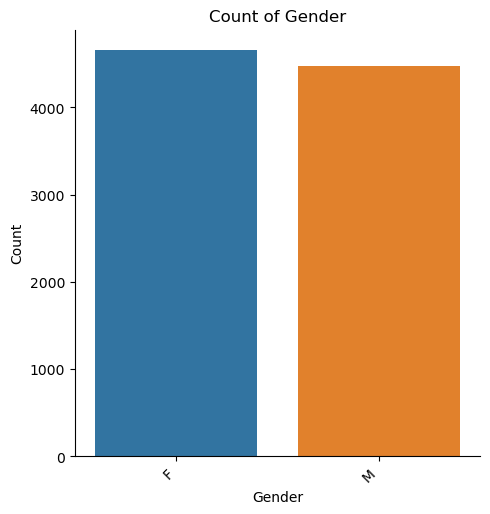

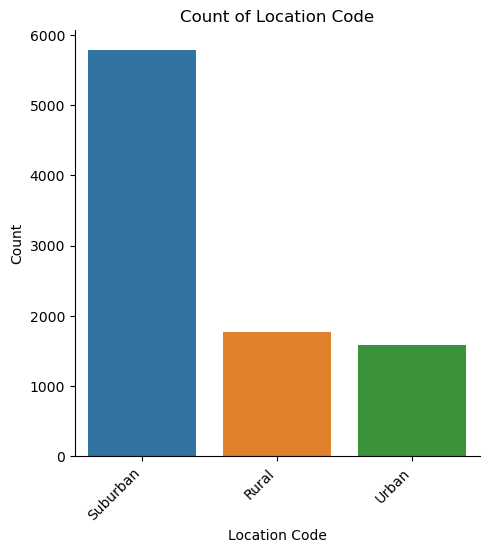

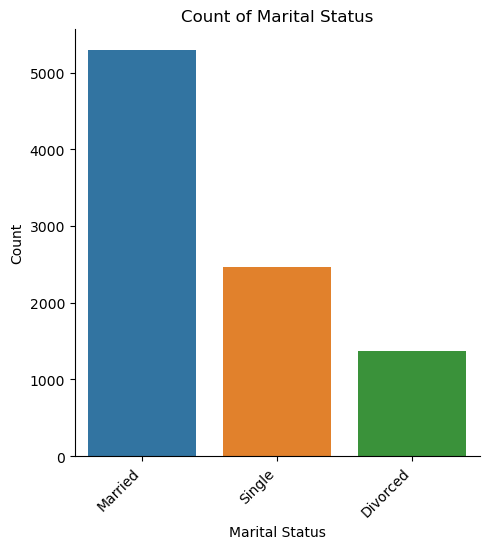

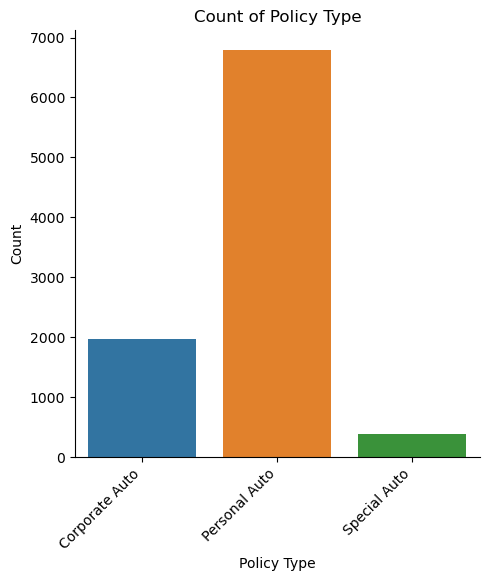

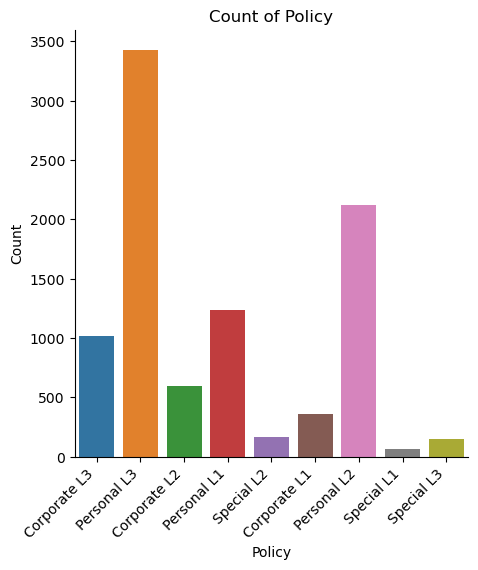

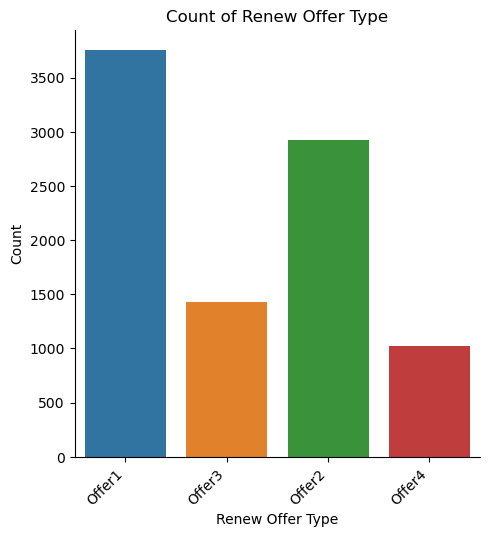

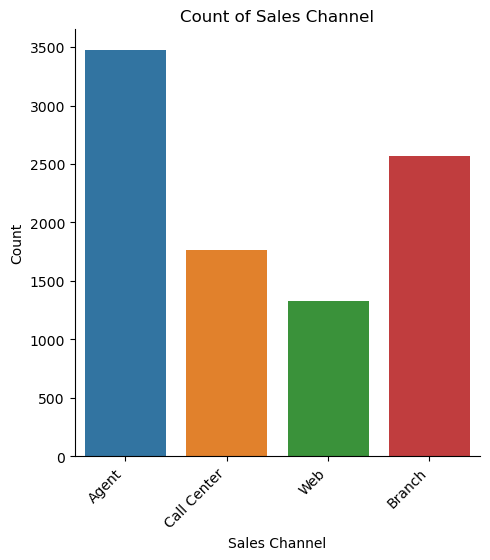

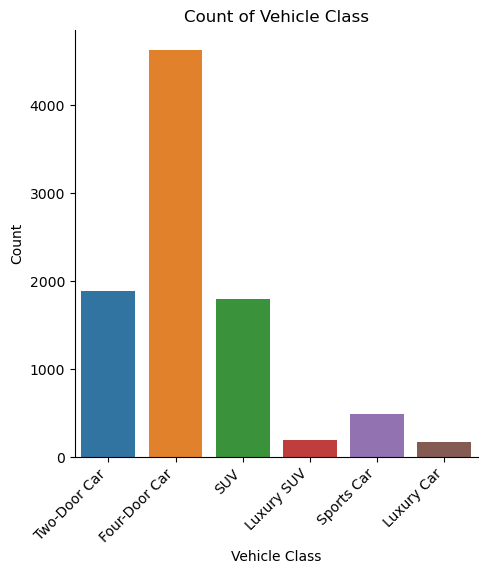

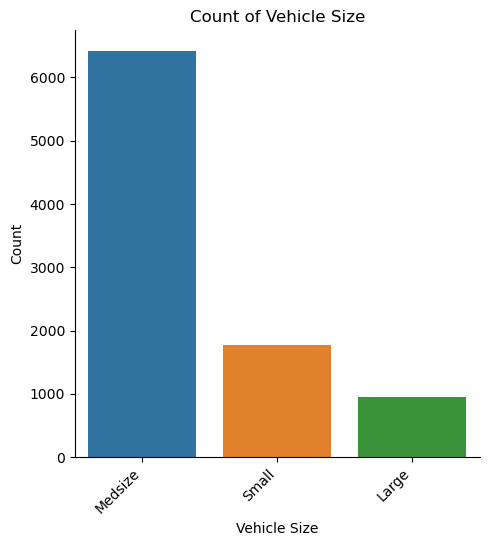

In [9]:
for col in categorical_df:
    sns.catplot(x=col, kind='count', data=customer_df)
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.title(f'Count of {col}')
    plt.xticks(rotation=45, ha='right') # adjust the spacing between the labels
    plt.show()

### For the categorical data, check if there is any data cleaning that need to perform. Hint: You can use the function value_counts() on each of the categorical columns and check the representation of different categories in each column. Discuss if this information might in some way be used for data cleaning.

In [10]:
for col in categorical_df:
    print(col + ':\n' + str(categorical_df[col].value_counts()) + '\n')

State:
California    3150
Oregon        2601
Arizona       1703
Nevada         882
Washington     798
Name: State, dtype: int64

Response:
No     7826
Yes    1308
Name: Response, dtype: int64

Coverage:
Basic       5568
Extended    2742
Premium      824
Name: Coverage, dtype: int64

Education:
Bachelor                2748
College                 2681
High School or Below    2622
Master                   741
Doctor                   342
Name: Education, dtype: int64

EmploymentStatus:
Employed         5698
Unemployed       2317
Medical Leave     432
Disabled          405
Retired           282
Name: EmploymentStatus, dtype: int64

Gender:
F    4658
M    4476
Name: Gender, dtype: int64

Location Code:
Suburban    5779
Rural       1773
Urban       1582
Name: Location Code, dtype: int64

Marital Status:
Married     5298
Single      2467
Divorced    1369
Name: Marital Status, dtype: int64

Policy Type:
Personal Auto     6788
Corporate Auto    1968
Special Auto       378
Name: Policy Type, dt

Using this function we can easily see the different values for all categorical columns, allowing us to check if we need to clean up any NaNs / unknowns. In this case, it seems that all data is relevant. 

# Feature extraction

### Plot all the categorical variables with the proper plot. What can you see?

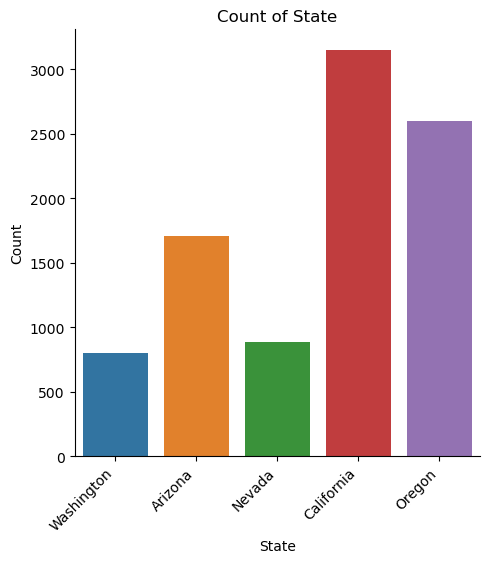

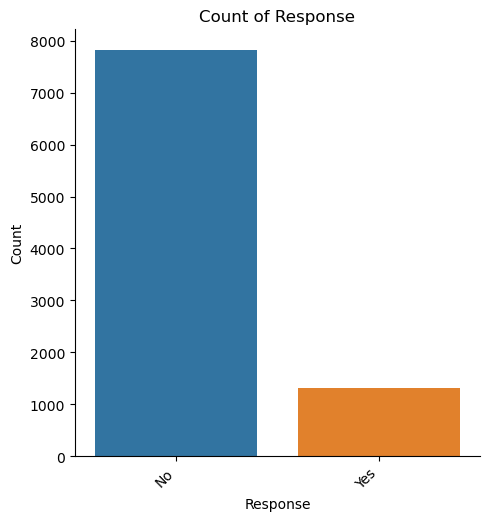

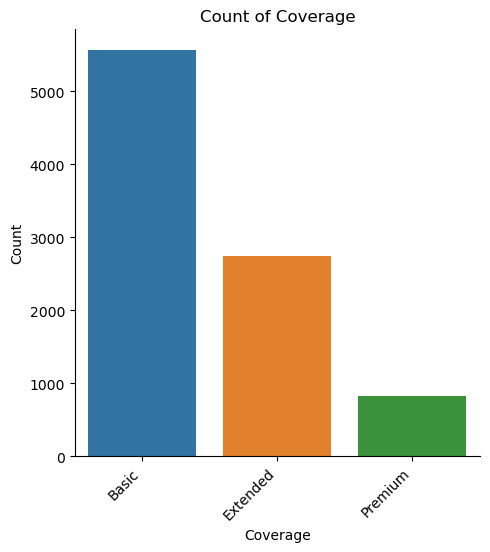

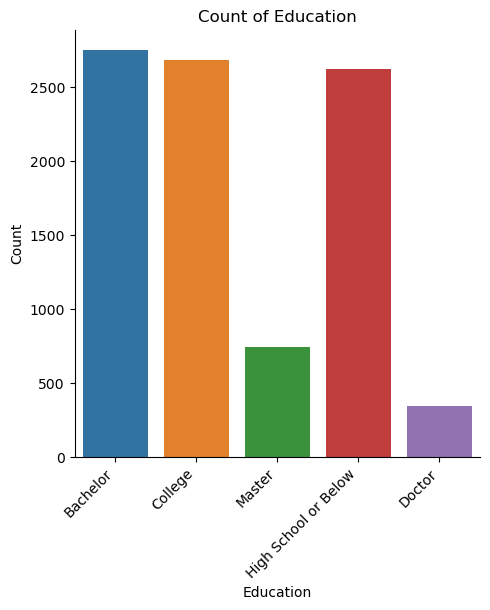

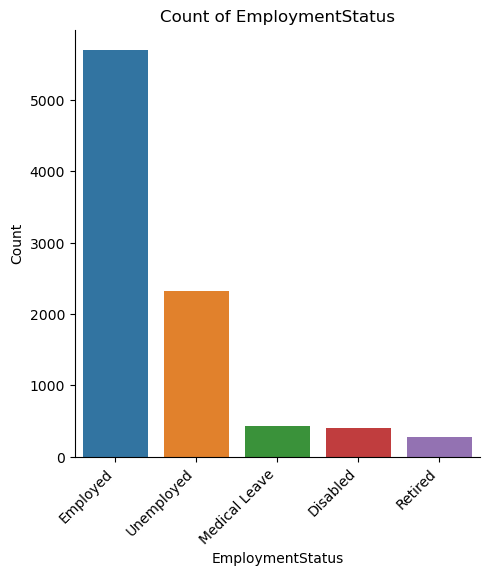

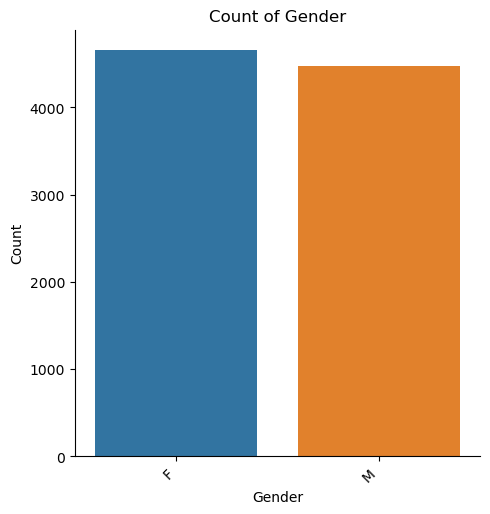

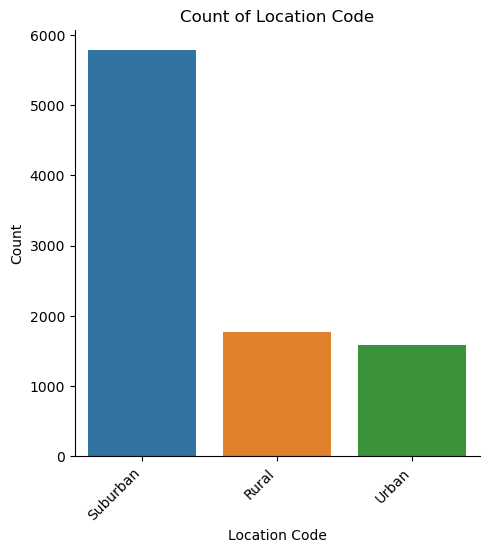

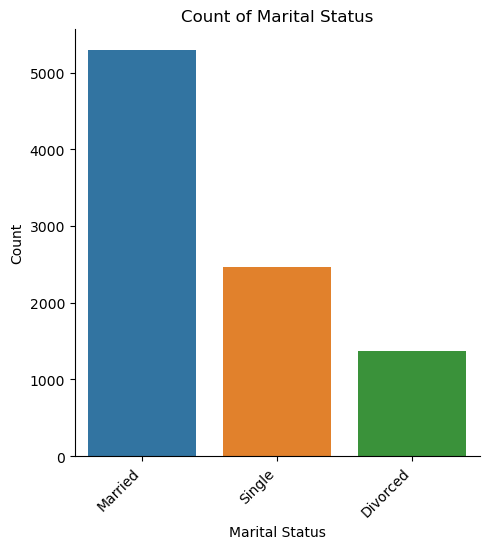

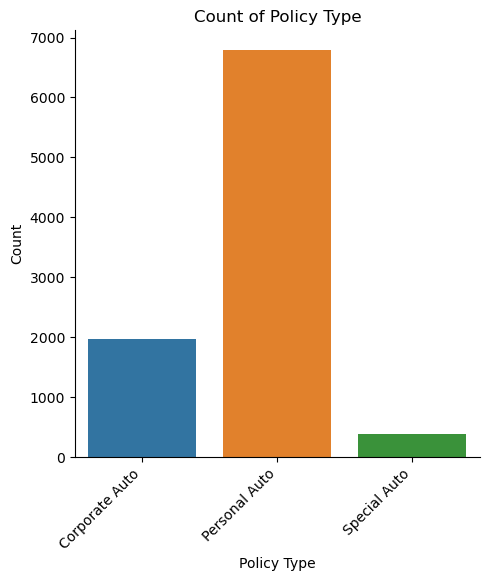

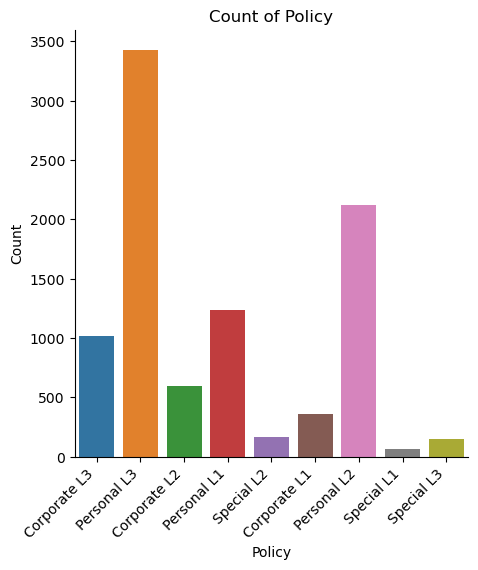

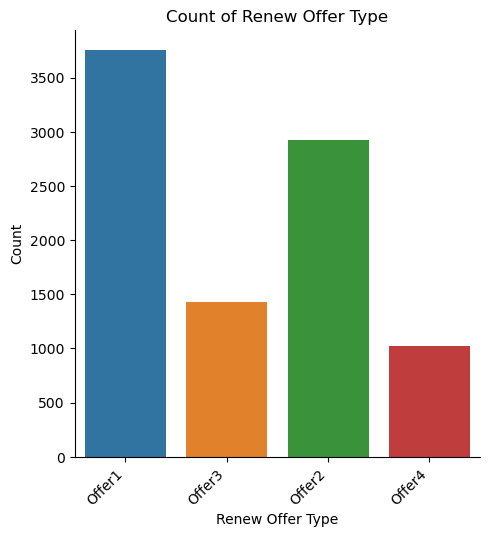

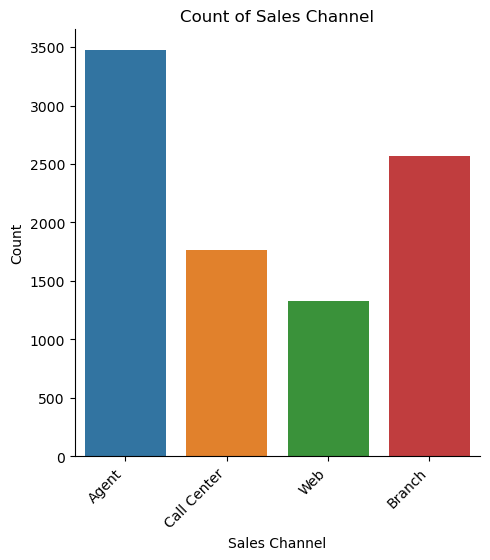

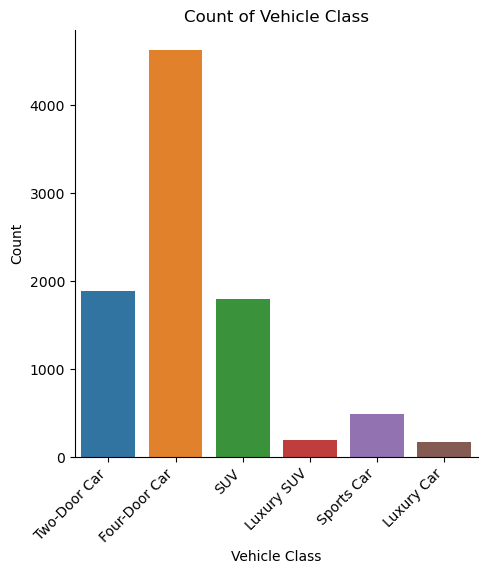

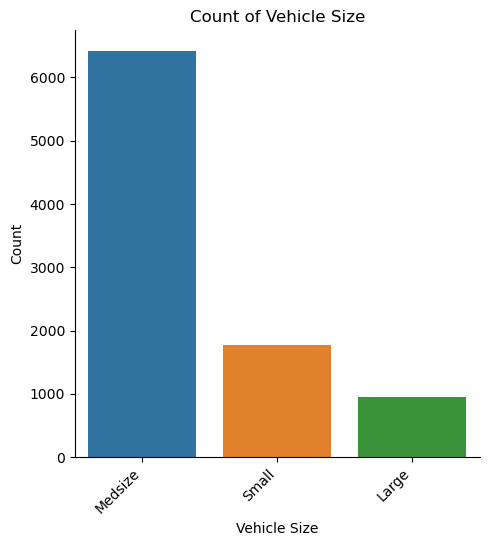

In [11]:
for col in categorical_df:
    sns.catplot(x=col, kind='count', data=customer_df)
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.title(f'Count of {col}')
    plt.xticks(rotation=45, ha='right') # adjust the spacing between the labels
    plt.show()

We can observe multiple trends: the most popular state is California, most leads respond No, most customers have Basic coverage, most customers don't have further education beyond College and are Employed, most live in Suburban areas and are Married. The most popular policy is Personal Auto for a Medium sized car. 

### There might be some columns that seem to be redundant, check their values to be sure. What should we do with them?

In [12]:
for col in categorical_df:
    print(col + ':\n' + str(categorical_df[col].value_counts()) + '\n')

State:
California    3150
Oregon        2601
Arizona       1703
Nevada         882
Washington     798
Name: State, dtype: int64

Response:
No     7826
Yes    1308
Name: Response, dtype: int64

Coverage:
Basic       5568
Extended    2742
Premium      824
Name: Coverage, dtype: int64

Education:
Bachelor                2748
College                 2681
High School or Below    2622
Master                   741
Doctor                   342
Name: Education, dtype: int64

EmploymentStatus:
Employed         5698
Unemployed       2317
Medical Leave     432
Disabled          405
Retired           282
Name: EmploymentStatus, dtype: int64

Gender:
F    4658
M    4476
Name: Gender, dtype: int64

Location Code:
Suburban    5779
Rural       1773
Urban       1582
Name: Location Code, dtype: int64

Marital Status:
Married     5298
Single      2467
Divorced    1369
Name: Marital Status, dtype: int64

Policy Type:
Personal Auto     6788
Corporate Auto    1968
Special Auto       378
Name: Policy Type, dt

In [13]:
contingency_table = pd.crosstab(categorical_df['Vehicle Class'], categorical_df['Vehicle Size'])
chi2, p_value, dof, expected = chi2_contingency(contingency_table)
print(f'Chi-square value: {chi2:.4f}')
print(f'p-value: {p_value:.4f}')
print(f'Degrees of freedom: {dof}')
print('Expected frequencies:')
print(expected)

Chi-square value: 24.6617
p-value: 0.0060
Degrees of freedom: 10
Expected frequencies:
[[ 478.59273046 3249.97854171  892.42872783]
 [  16.88176046  114.63893146   31.47930808]
 [  19.05671119  129.40836435   35.53492446]
 [ 186.01007226 1263.1381651   346.85176265]
 [  50.12743595  340.40026275   93.47230129]
 [ 195.33128969 1326.43573462  364.2329757 ]]


In [14]:
contingency_table = pd.crosstab(categorical_df['Policy Type'], categorical_df['Policy'])
chi2, p_value, dof, expected = chi2_contingency(contingency_table)
print(f'Chi-square value: {chi2:.4f}')
print(f'p-value: {p_value:.4f}')
print(f'Degrees of freedom: {dof}')
print('Expected frequencies:')
print(expected)

Chi-square value: 18268.0000
p-value: 0.0000
Degrees of freedom: 16
Expected frequencies:
[[  77.3496825   128.19794176  218.4751478   267.16881979  457.20341581
   738.16159404   14.22027589   35.33523101   31.88789139]
 [ 266.79351872  442.17867309  753.56163784  921.51521787 1576.98007445
  2546.05736808   49.04839063  121.87781914  109.9873002 ]
 [  14.85679877   24.62338515   41.96321436   51.31596234   87.81650974
   141.78103788    2.73133348    6.78694986    6.12480841]]


In [15]:
categorical_df = categorical_df.drop('Policy', axis=1)

Conducting the chi-square test, we can see that Vehicle Class and Vehicle Size do not deliver statistically significant tests. On the other hand, for Policy Type and Policy, we can conclude that there is a significant association between the two columns and could take only one of them.

### Plot time variable. Can you extract something from it?

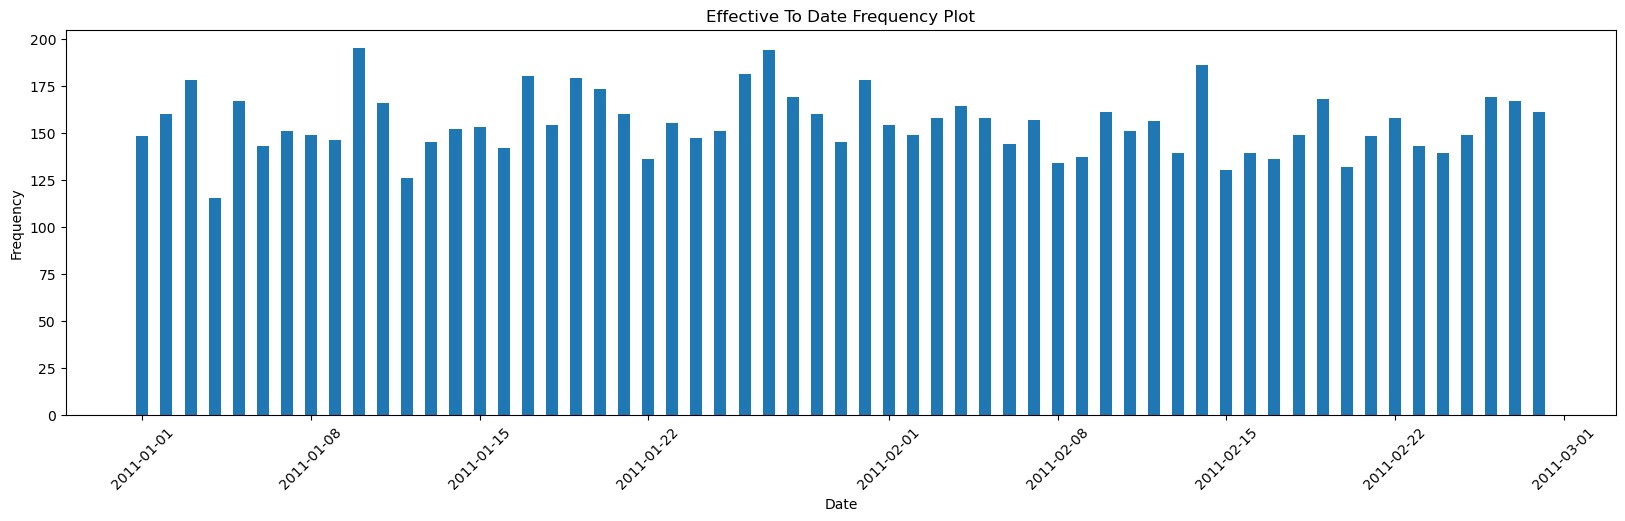

In [16]:
freq_by_day = customer_df.groupby(customer_df['Effective To Date'].dt.date).size()

# Create a bar plot of the frequencies
plt.figure(figsize=(20,5))
plt.bar(freq_by_day.index, freq_by_day.values, width=0.5)
plt.xlabel('Date')
plt.ylabel('Frequency')
plt.title('Effective To Date Frequency Plot')
plt.xticks(rotation=45)
plt.show()

# Data cleaning & wrangling

### We will start with removing outliers. So far, we have discussed different methods to remove outliers. Use the one you feel more comfortable with, define a function for that. Use the function to remove the outliers and apply it to the dataframe.

In [17]:
def remove_outliers(df, columns):
   
    df_copy = df.copy()

    for col in columns:
        q1 = df_copy[col].quantile(0.25)
        q3 = df_copy[col].quantile(0.75)
        iqr = q3 - q1
        lower_bound = q1 - 1.5 * iqr
        upper_bound = q3 + 1.5 * iqr
        df_copy = df_copy[(df_copy[col] >= lower_bound) & (df_copy[col] <= upper_bound)]

    return df_copy

### Create a copy of the dataframe for the data wrangling.

In [18]:
numerical_copy = remove_outliers(numerical_df, numerical_df.columns)
numerical_copy

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
0,2763.519279,56274,69,32,5,0,1,384.811147
2,12887.431650,48767,108,18,38,0,2,566.472247
3,7645.861827,0,106,18,65,0,7,529.881344
4,2813.692575,43836,73,12,44,0,1,138.130879
5,8256.297800,62902,69,14,94,0,2,159.383042
...,...,...,...,...,...,...,...,...
9127,5032.165498,66367,64,6,48,0,3,307.200000
9128,4100.398533,47761,104,16,58,0,1,541.282007
9130,3096.511217,21604,79,14,28,0,1,379.200000
9132,7524.442436,21941,96,34,3,0,3,691.200000


### Normalize the continuous variables. You can use any one method you want.

In [19]:
cols_to_normalize = ['Customer Lifetime Value', 'Income', 'Monthly Premium Auto']
scaler = MinMaxScaler()
numerical_copy[cols_to_normalize] = scaler.fit_transform(numerical_copy[cols_to_normalize])
numerical_copy.head()

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
0,0.053337,0.562847,0.076923,32,5,0,1,384.811147
2,0.755758,0.487763,0.451923,18,38,0,2,566.472247
3,0.392086,0.000000,0.432692,18,65,0,7,529.881344
4,0.056818,0.438443,0.115385,12,44,0,1,138.130879
5,0.434439,0.629140,0.076923,14,94,0,2,159.383042


### Encode the categorical variables

In [20]:
categorical_df

,State,Response,Coverage,Education,EmploymentStatus,Gender,Location Code,Marital Status,Policy Type,Renew Offer Type,Sales Channel,Vehicle Class,Vehicle Size
0,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate Auto,Offer1,Agent,Two-Door Car,Medsize
1,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal Auto,Offer3,Agent,Four-Door Car,Medsize
2,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal Auto,Offer1,Agent,Two-Door Car,Medsize
3,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate Auto,Offer1,Call Center,SUV,Medsize
4,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,Personal Auto,Offer1,Agent,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,California,No,Basic,Bachelor,Employed,M,Urban,Married,Personal Auto,Offer2,Web,Four-Door Car,Medsize
9130,California,Yes,Extended,College,Employed,F,Suburban,Divorced,Corporate Auto,Offer1,Branch,Four-Door Car,Medsize
9131,California,No,Extended,Bachelor,Unemployed,M,Suburban,Single,Corporate Auto,Offer1,Branch,Four-Door Car,Medsize
9132,California,No,Extended,College,Employed,M,Suburban,Married,Personal Auto,Offer3,Branch,Four-Door Car,Large


In [21]:
categorical_copy = pd.get_dummies(categorical_df, columns=['State', 'Education', 'Marital Status', 'Policy Type', 'Marital Status', 'Renew Offer Type', 'Sales Channel', 'Vehicle Class', 'Vehicle Size'])
categorical_copy.head()

,Response,Coverage,EmploymentStatus,Gender,Location Code,State_Arizona,State_California,State_Nevada,State_Oregon,State_Washington,...,Sales Channel_Web,Vehicle Class_Four-Door Car,Vehicle Class_Luxury Car,Vehicle Class_Luxury SUV,Vehicle Class_SUV,Vehicle Class_Sports Car,Vehicle Class_Two-Door Car,Vehicle Size_Large,Vehicle Size_Medsize,Vehicle Size_Small
0,No,Basic,Employed,F,Suburban,0,0,0,0,1,...,0,0,0,0,0,0,1,0,1,0
1,No,Extended,Unemployed,F,Suburban,1,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
2,No,Premium,Employed,F,Suburban,0,0,1,0,0,...,0,0,0,0,0,0,1,0,1,0
3,No,Basic,Unemployed,M,Suburban,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0
4,No,Basic,Employed,M,Rural,0,0,0,0,1,...,0,1,0,0,0,0,0,0,1,0


In [22]:
categorical_copy["Coverage"] = categorical_copy["Coverage"].map({"Basic" : 0, "Extended" : 1, "Premium" : 2})
categorical_copy["Response"] = categorical_copy["Response"].map({"No" : 0, "Yes" : 1})
categorical_copy["EmploymentStatus"] = categorical_copy["EmploymentStatus"].map({"Employed" : 0, "Unemployed" : 1, 'Medical Leave': 2, 'Retired': 3, 'Disabled': 4})
categorical_copy["Gender"] = categorical_copy["Gender"].map({"F" : 0, "M" : 1})
categorical_copy["Location Code"] = categorical_copy["Location Code"].map({"Suburban" : 0, "Rural" : 1, 'Urban': 2})

In [26]:
categorical_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 41 columns):
 #   Column                          Non-Null Count  Dtype
---  ------                          --------------  -----
 0   Response                        9134 non-null   int64
 1   Coverage                        9134 non-null   int64
 2   EmploymentStatus                9134 non-null   int64
 3   Gender                          9134 non-null   int64
 4   Location Code                   9134 non-null   int64
 5   State_Arizona                   9134 non-null   uint8
 6   State_California                9134 non-null   uint8
 7   State_Nevada                    9134 non-null   uint8
 8   State_Oregon                    9134 non-null   uint8
 9   State_Washington                9134 non-null   uint8
 10  Education_Bachelor              9134 non-null   uint8
 11  Education_College               9134 non-null   uint8
 12  Education_Doctor                9134 non-null   uint8
 13  Edu

### The time variable can be useful. Try to transform its data into a useful one. Hint: Day week and month as integers might be useful.

In [27]:
customer_df['Effective To Date'].head()

0   2011-02-24
1   2011-01-31
2   2011-02-19
3   2011-01-20
4   2011-02-03
Name: Effective To Date, dtype: datetime64[ns]

In [30]:
numerical_copy = numerical_copy.assign(
    effective_to_date_day=customer_df['Effective To Date'].dt.day,
    effective_to_date_month=customer_df['Effective To Date'].dt.month,
    effective_to_date_year=customer_df['Effective To Date'].dt.year
)

numerical_copy.head()

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount,effective_to_date_day,effective_to_date_month,effective_to_date_year
0,0.053337,0.562847,0.076923,32,5,0,1,384.811147,24,2,2011
2,0.755758,0.487763,0.451923,18,38,0,2,566.472247,19,2,2011
3,0.392086,0.000000,0.432692,18,65,0,7,529.881344,20,1,2011
4,0.056818,0.438443,0.115385,12,44,0,1,138.130879,3,2,2011
5,0.434439,0.629140,0.076923,14,94,0,2,159.383042,25,1,2011


In [31]:
numerical_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5888 entries, 0 to 9133
Data columns (total 11 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer Lifetime Value        5888 non-null   float64
 1   Income                         5888 non-null   float64
 2   Monthly Premium Auto           5888 non-null   float64
 3   Months Since Last Claim        5888 non-null   int64  
 4   Months Since Policy Inception  5888 non-null   int64  
 5   Number of Open Complaints      5888 non-null   int64  
 6   Number of Policies             5888 non-null   int64  
 7   Total Claim Amount             5888 non-null   float64
 8   effective_to_date_day          5888 non-null   int64  
 9   effective_to_date_month        5888 non-null   int64  
 10  effective_to_date_year         5888 non-null   int64  
dtypes: float64(4), int64(7)
memory usage: 552.0 KB
